#***ARIMA***

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/Bnb.csv')

#8:2

In [2]:
# Chỉ lấy cột giá đóng cửa
prices = data['Close'].values

# Phân chia dữ liệu theo tỉ lệ 8:2
train_size = int(len(prices) * 0.8)
test_size = int(len(prices) * 0.2)

train, test = prices[:train_size], prices[train_size:train_size+test_size]

print(f'train: {train_size}')
print(f'test: {test_size}')

# Xây dựng và huấn luyện mô hình ARIMA
model = ARIMA(train, order=(5, 1, 0))  # Cấu hình order có thể được điều chỉnh dựa trên dữ liệu
model_fit = model.fit()

# Dự đoán trên tập test
test_predict = model_fit.forecast(steps=len(test))

train: 1536
test: 384


In [3]:
# Đánh giá mô hình
mse = mean_squared_error(test, test_predict)
mae = mean_absolute_error(test, test_predict)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - test_predict) / test)) * 100

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

MAE: 108.14327314973639
RMSE: 141.7857981256149
MAPE: 30.45645394152004


30-day predictions: [311.95014921383904, 313.09024202185105, 312.91720097347974, 312.72973046209484, 312.69418419422493, 312.7047814742829, 312.5462583568475, 312.58446482919345, 312.5894826515764, 312.58479338294507, 312.58572441314936, 312.60524864638637, 312.59782430076064, 312.59983242891207, 312.60096474332323, 312.60052408015525, 312.5983733839365, 312.5996255084189, 312.59901733946987, 312.59890117291985, 312.5989894162092, 312.599197850432, 312.5990108256493, 312.5991319552183, 312.59913083719124, 312.59911872099303, 312.5991018548209, 312.59912695920553, 312.5991066304773, 312.599110159934]
60-day predictions: [311.95014921383904, 313.09024202185105, 312.91720097347974, 312.72973046209484, 312.69418419422493, 312.7047814742829, 312.5462583568475, 312.58446482919345, 312.5894826515764, 312.58479338294507, 312.58572441314936, 312.60524864638637, 312.59782430076064, 312.59983242891207, 312.60096474332323, 312.60052408015525, 312.5983733839365, 312.5996255084189, 312.5990173394698

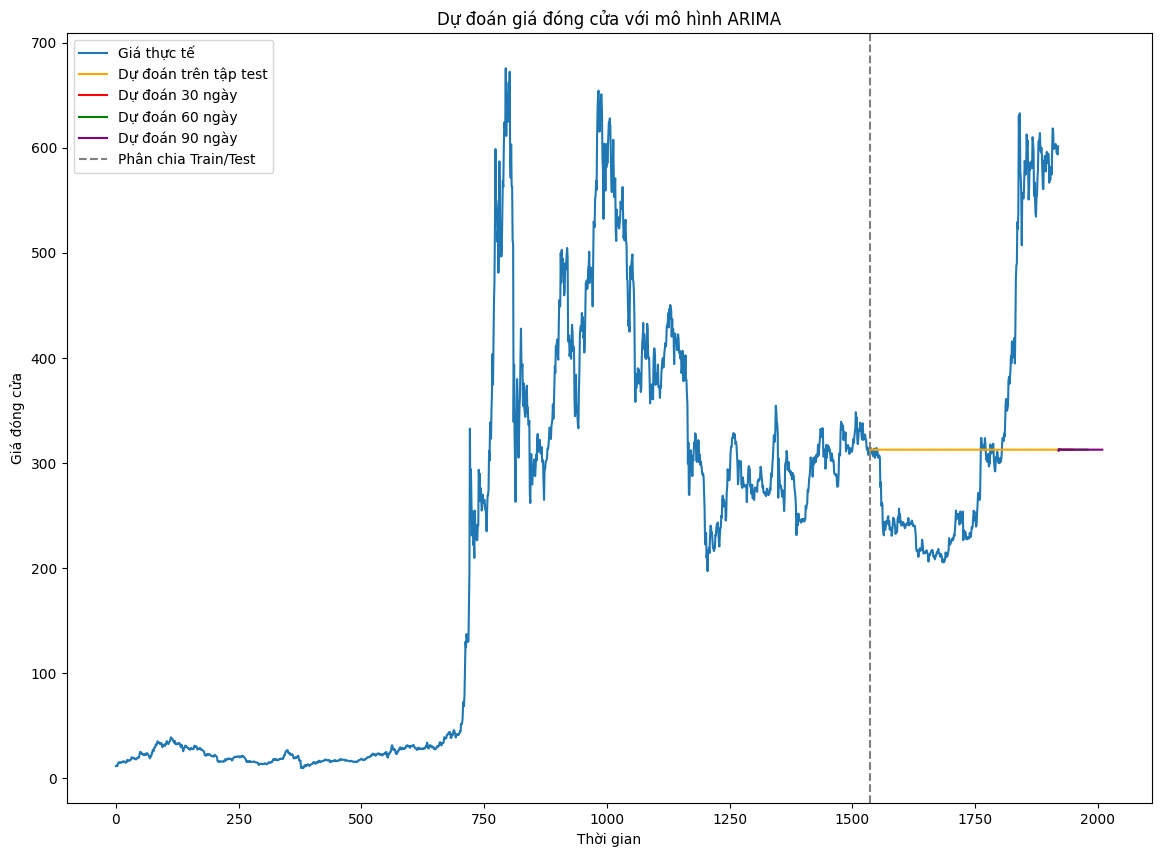

In [4]:
# Dự đoán tương lai
def predict_future_arima(model_fit, steps):
    future_predict = model_fit.get_forecast(steps=steps)
    future_pred_mean = future_predict.predicted_mean
    return future_pred_mean

# Dự đoán 30, 60, và 90 ngày
pred_30 = predict_future_arima(model_fit, 30)
pred_60 = predict_future_arima(model_fit, 60)
pred_90 = predict_future_arima(model_fit, 90)

# In ra kết quả dự đoán từng ngày cho 30, 60, và 90 ngày
print("30-day predictions:", pred_30.tolist())
print("60-day predictions:", pred_60.tolist())
print("90-day predictions:", pred_90.tolist())

# Vẽ biểu đồ kết quả
plt.figure(figsize=(14, 10))
plt.plot(prices, label='Giá thực tế')
plt.plot(np.arange(len(train), len(train) + len(test)), test_predict, label='Dự đoán trên tập test', color='orange')
plt.plot(np.arange(len(prices), len(prices) + 30), pred_30, label='Dự đoán 30 ngày', color='red')
plt.plot(np.arange(len(prices), len(prices) + 60), pred_60, label='Dự đoán 60 ngày', color='green')
plt.plot(np.arange(len(prices), len(prices) + 90), pred_90, label='Dự đoán 90 ngày', color='purple')
plt.axvline(x=len(train), color='gray', linestyle='--', label='Phân chia Train/Test')
plt.legend()
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa')
plt.title('Dự đoán giá đóng cửa với mô hình ARIMA')
plt.show()


#7:3

In [5]:
# Chỉ lấy cột giá đóng cửa
prices = data['Close'].values

# Phân chia dữ liệu theo tỉ lệ 7:3
train_size = int(len(prices) * 0.7)
test_size = int(len(prices) * 0.3)

train, test = prices[:train_size], prices[train_size:train_size+test_size]

print(f'train: {train_size}')
print(f'test: {test_size}')

# Xây dựng và huấn luyện mô hình ARIMA
model = ARIMA(train, order=(5, 1, 0))  # Cấu hình order có thể được điều chỉnh dựa trên dữ liệu
model_fit = model.fit()

# Dự đoán trên tập test
test_predict = model_fit.forecast(steps=len(test))

train: 1344
test: 576


In [6]:
# Đánh giá mô hình
mse = mean_squared_error(test, test_predict)
mae = mean_absolute_error(test, test_predict)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - test_predict) / test)) * 100

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

MAE: 85.28405971345808
RMSE: 116.68715251469729
MAPE: 25.833258541255887


30-day predictions: [326.8246554750502, 326.190033584845, 326.8813352016858, 327.12759304324953, 325.9122501578245, 326.4970407556391, 326.4094996696512, 326.3040886764349, 326.31429245977165, 326.4509319846392, 326.35367487171857, 326.3898585679621, 326.3990342876755, 326.39372026474655, 326.38035301288437, 326.3945024184823, 326.3866230787411, 326.3868321814193, 326.38767375487464, 326.3887583006798, 326.3869133828286, 326.3882904331636, 326.3879976452225, 326.3879325979763, 326.38786745895845, 326.38808524287595, 326.3878740415194, 326.38795280232847, 326.387946353127, 326.38794868557517]
60-day predictions: [326.8246554750502, 326.190033584845, 326.8813352016858, 327.12759304324953, 325.9122501578245, 326.4970407556391, 326.4094996696512, 326.3040886764349, 326.31429245977165, 326.4509319846392, 326.35367487171857, 326.3898585679621, 326.3990342876755, 326.39372026474655, 326.38035301288437, 326.3945024184823, 326.3866230787411, 326.3868321814193, 326.38767375487464, 326.3887583006

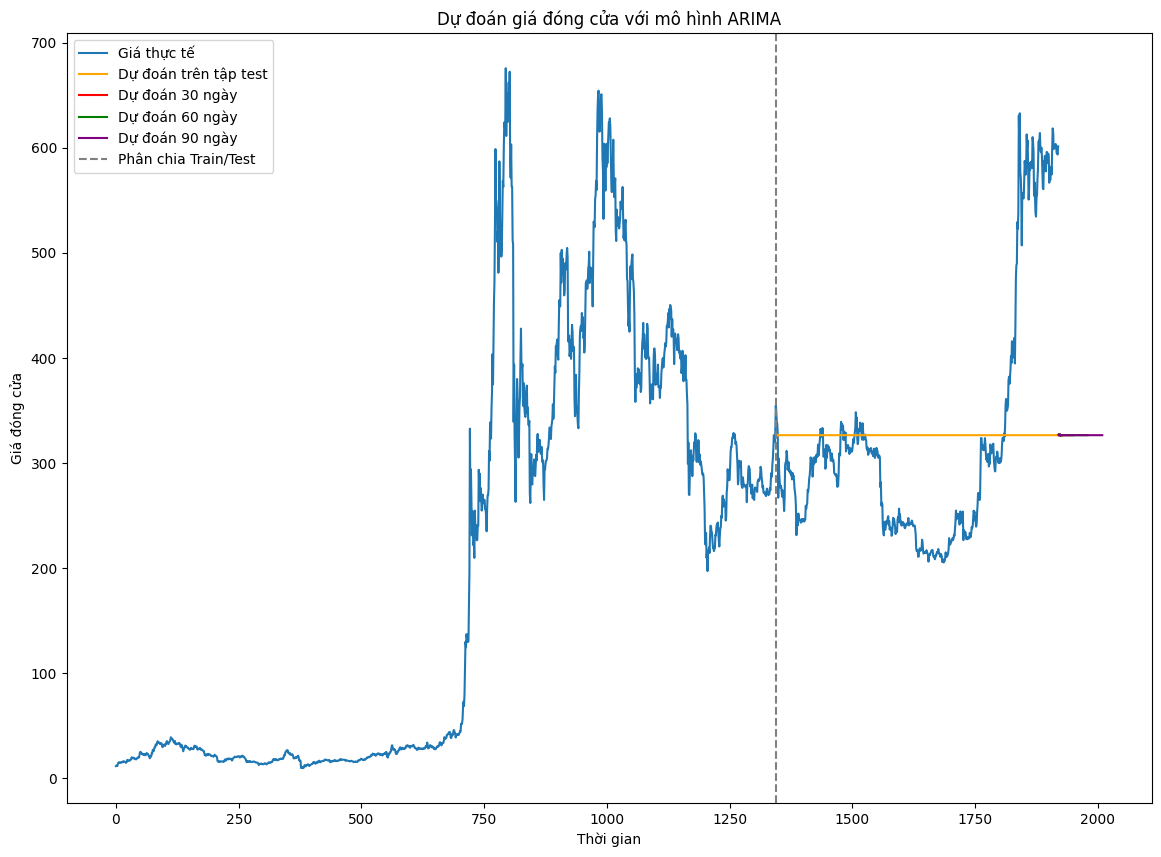

In [7]:
# Dự đoán tương lai
def predict_future_arima(model_fit, steps):
    future_predict = model_fit.get_forecast(steps=steps)
    future_pred_mean = future_predict.predicted_mean
    return future_pred_mean

# Dự đoán 30, 60, và 90 ngày
pred_30 = predict_future_arima(model_fit, 30)
pred_60 = predict_future_arima(model_fit, 60)
pred_90 = predict_future_arima(model_fit, 90)

# In ra kết quả dự đoán từng ngày cho 30, 60, và 90 ngày
print("30-day predictions:", pred_30.tolist())
print("60-day predictions:", pred_60.tolist())
print("90-day predictions:", pred_90.tolist())

# Vẽ biểu đồ kết quả
plt.figure(figsize=(14, 10))
plt.plot(prices, label='Giá thực tế')
plt.plot(np.arange(len(train), len(train) + len(test)), test_predict, label='Dự đoán trên tập test', color='orange')
plt.plot(np.arange(len(prices), len(prices) + 30), pred_30, label='Dự đoán 30 ngày', color='red')
plt.plot(np.arange(len(prices), len(prices) + 60), pred_60, label='Dự đoán 60 ngày', color='green')
plt.plot(np.arange(len(prices), len(prices) + 90), pred_90, label='Dự đoán 90 ngày', color='purple')
plt.axvline(x=len(train), color='gray', linestyle='--', label='Phân chia Train/Test')
plt.legend()
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa')
plt.title('Dự đoán giá đóng cửa với mô hình ARIMA')
plt.show()


#6:4

In [8]:
# Chỉ lấy cột giá đóng cửa
prices = data['Close'].values

# Phân chia dữ liệu theo tỉ lệ 6:2:2
train_size = int(len(prices) * 0.6)
test_size = int(len(prices) * 0.4)

train, test = prices[:train_size], prices[train_size:train_size+test_size]

print(f'train: {train_size}')
print(f'test: {test_size}')

# Xây dựng và huấn luyện mô hình ARIMA
model = ARIMA(train, order=(5, 1, 0))  # Cấu hình order có thể được điều chỉnh dựa trên dữ liệu
model_fit = model.fit()

# Dự đoán trên tập test
test_predict = model_fit.forecast(steps=len(test))

train: 1152
test: 768


In [9]:
# Đánh giá mô hình
mse = mean_squared_error(test, test_predict)
mae = mean_absolute_error(test, test_predict)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - test_predict) / test)) * 100

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

MAE: 131.6748719893059
RMSE: 139.24129786379592
MAPE: 46.77651846175201


30-day predictions: [404.85969565063004, 404.73288675143107, 405.83131548362655, 406.1115099251767, 405.4733879182038, 405.58829341689744, 405.56915272058046, 405.3953183750849, 405.3798437005865, 405.45137981496373, 405.41322791491825, 405.4235711163234, 405.4467373886868, 405.44481480076615, 405.43785149190643, 405.44536870478424, 405.44258360903075, 405.440016087995, 405.4408122658904, 405.4413056714155, 405.4401048230388, 405.4406947634911, 405.4408992752414, 405.4407392334025, 405.4407391173318, 405.4409052872269, 405.4407971337677, 405.4407963267756, 405.440820047232, 405.44081133291706]
60-day predictions: [404.85969565063004, 404.73288675143107, 405.83131548362655, 406.1115099251767, 405.4733879182038, 405.58829341689744, 405.56915272058046, 405.3953183750849, 405.3798437005865, 405.45137981496373, 405.41322791491825, 405.4235711163234, 405.4467373886868, 405.44481480076615, 405.43785149190643, 405.44536870478424, 405.44258360903075, 405.440016087995, 405.4408122658904, 405.441

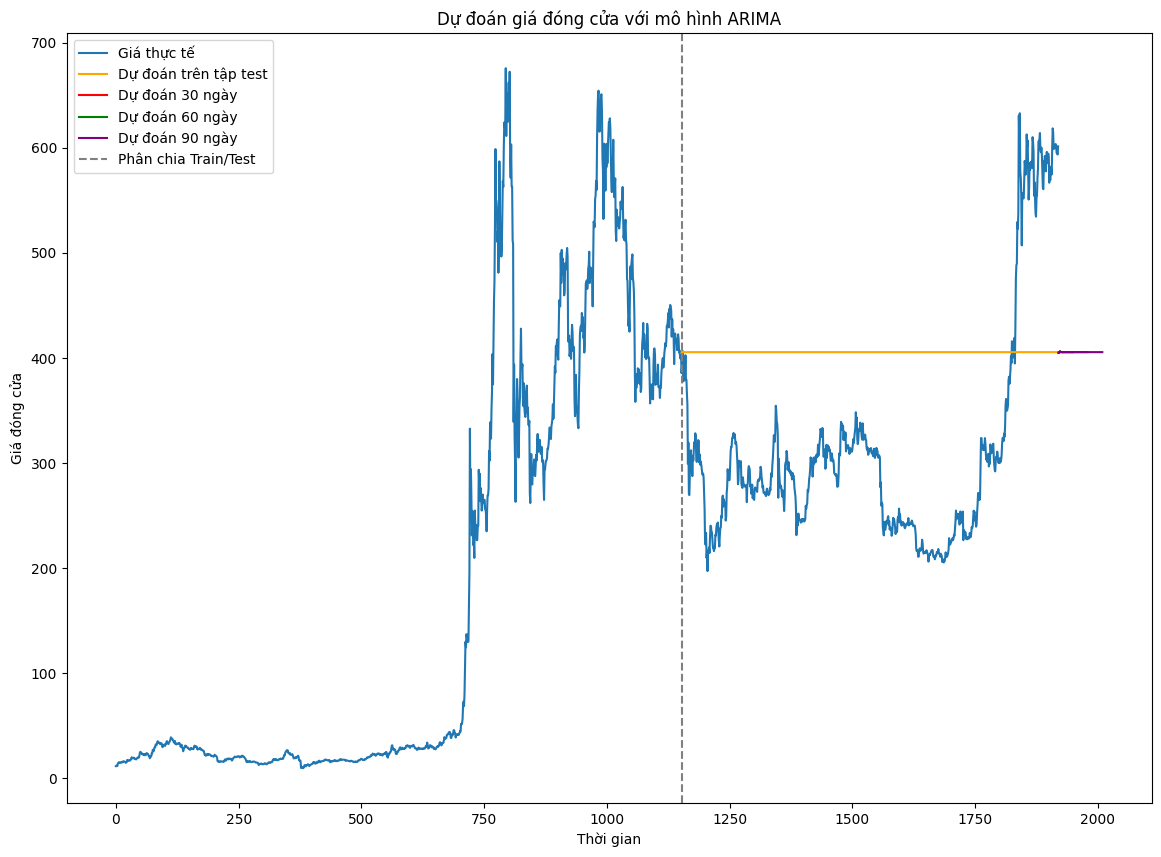

In [10]:
# Dự đoán tương lai
def predict_future_arima(model_fit, steps):
    future_predict = model_fit.get_forecast(steps=steps)
    future_pred_mean = future_predict.predicted_mean
    return future_pred_mean

# Dự đoán 30, 60, và 90 ngày
pred_30 = predict_future_arima(model_fit, 30)
pred_60 = predict_future_arima(model_fit, 60)
pred_90 = predict_future_arima(model_fit, 90)

# In ra kết quả dự đoán từng ngày cho 30, 60, và 90 ngày
print("30-day predictions:", pred_30.tolist())
print("60-day predictions:", pred_60.tolist())
print("90-day predictions:", pred_90.tolist())

# Vẽ biểu đồ kết quả
plt.figure(figsize=(14, 10))
plt.plot(prices, label='Giá thực tế')
plt.plot(np.arange(len(train), len(train) + len(test)), test_predict, label='Dự đoán trên tập test', color='orange')
plt.plot(np.arange(len(prices), len(prices) + 30), pred_30, label='Dự đoán 30 ngày', color='red')
plt.plot(np.arange(len(prices), len(prices) + 60), pred_60, label='Dự đoán 60 ngày', color='green')
plt.plot(np.arange(len(prices), len(prices) + 90), pred_90, label='Dự đoán 90 ngày', color='purple')
plt.axvline(x=len(train), color='gray', linestyle='--', label='Phân chia Train/Test')
plt.legend()
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa')
plt.title('Dự đoán giá đóng cửa với mô hình ARIMA')
plt.show()
